In [2]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

param_grid = {'n_neighbors': np.arange(1, 21)}
kf = KFold(n_splits=5, random_state=10, shuffle=True)
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import make_moons

def train_grid_search(X, y): 
  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': np.arange(1, 20)}
  kf = KFold(n_splits=5, shuffle=True, random_state=10)
  grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy')
  grid_search.fit(X, y)
  return grid_search.cv_results_['mean_test_score']

mean_test_scores = []

In [4]:
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)

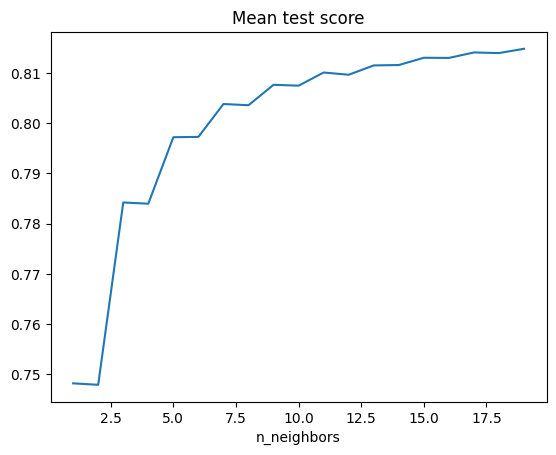

In [5]:
plt.plot(np.arange(1, 20), np.mean(mean_test_scores, axis=0))
plt.xlabel('n_neighbors')
plt.ylabel('')
plt.title('Mean test score')
plt.show()

In [7]:
!pip install python-mnist

  Using cached python_mnist-0.7-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached python_mnist-0.7-py2.py3-none-any.whl (9.6 kB)


In [9]:
from mnist import MNIST
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt

Accuracy на тестовой выборке: 0.955


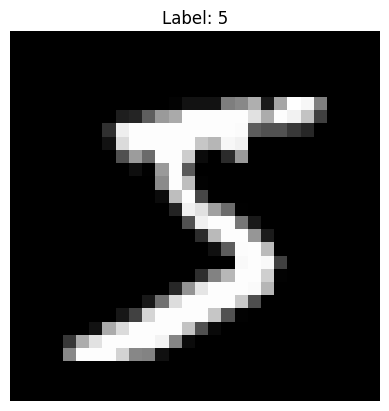

In [11]:
mndata = MNIST('./mnist')
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy на тестовой выборке: {accuracy}')

plt.imshow(images[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.axis('off')
plt.show()

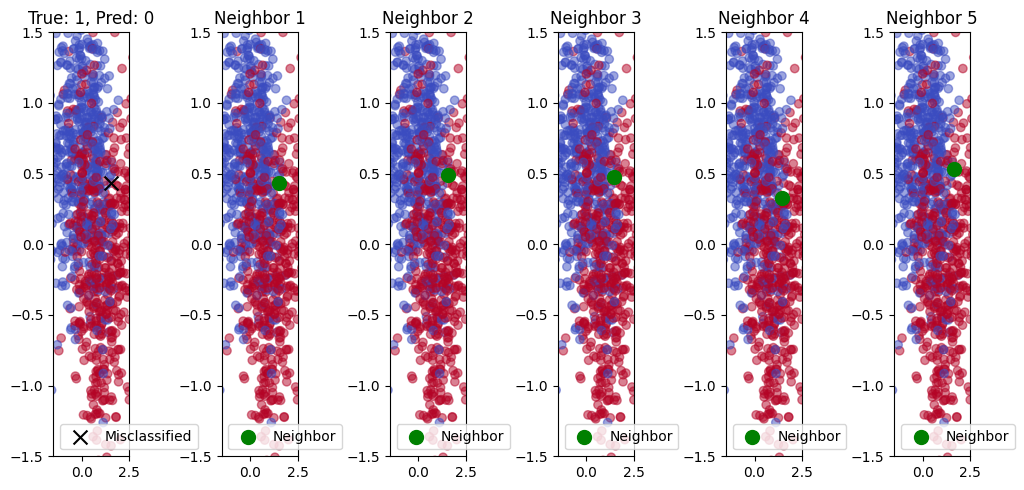

Misclassified Point: [1.53103318 0.43319894], True Label: 1, Predicted Label: 0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons

def train_grid_search(X, y):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)
    return knn

X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
knn = train_grid_search(X, y)
y_pred = knn.predict(X)

misclassified_indices = np.where(y_pred != y)[0]

if misclassified_indices.size > 0:
    index = misclassified_indices[0]
    misclassified_point = X[index]
    true_label = y[index]
    predicted_label = y_pred[index]

    distances, neighbors_indices = knn.kneighbors(misclassified_point.reshape(1, -1), n_neighbors=5)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 6, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
    plt.scatter(misclassified_point[0], misclassified_point[1], color='black', marker='x', s=100, label='Misclassified')
    plt.title(f'True: {true_label}, Pred: {predicted_label}')
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()

    for i in range(5):
        neighbor_index = neighbors_indices[0][i]
        plt.subplot(1, 6, i + 2)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
        plt.scatter(X[neighbor_index][0], X[neighbor_index][1], color='green', marker='o', s=100, label='Neighbor')
        plt.xlim(-1.5, 2.5)
        plt.ylim(-1.5, 1.5)
        plt.title(f'Neighbor {i + 1}')
        plt.legend()

    plt.tight_layout()
    plt.show()

    print(f'Misclassified Point: {misclassified_point}, True Label: {true_label}, Predicted Label: {predicted_label}')
else:
    print("Нет неправильно классифицированных примеров.")